In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import PolynomialFeatures
from utility_functions import (calculate_model_performance,
                               plot_data,
                               get_decision_boundary,
                               plot_ROC)
%matplotlib inline
#%precision 3

In [2]:
ex2data2 = np.loadtxt("data/ex2data2.txt", delimiter=",")

X = ex2data2[:, :-1]
y = ex2data2[:, -1]

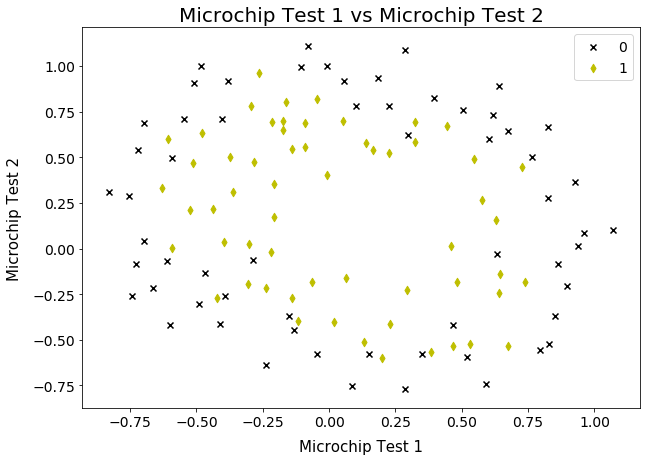

In [3]:
fig, ax = plt.subplots(figsize=(10,7))

# Divide the dataset as negatives and positives.
negatives = ex2data2[ex2data2[:, -1] == 0]
positives = ex2data2[ex2data2[:, -1] == 1]

# Make the plot pretty.
ax.set_xlabel("Microchip Test 1", fontsize=15, labelpad=10)
ax.set_ylabel("Microchip Test 2", fontsize=15, labelpad=10)
ax.set_title("Microchip Test 1 vs Microchip Test 2", fontsize=20)
ax.tick_params(labelsize=14)

# Plot both negative and positive classes to the same figure.
plot_data(ax, negatives[:, 0], negatives[:, 1], param_dict={"c": "black", "marker": "x", "label": "0"})
plot_data(ax, positives[:, 0], positives[:, 1], param_dict={"c": "y", "marker": "d", "label": "1"})
ax.legend(prop={'size': 14});

In [4]:
class RLogisticRegression:

    def __init__(self,
                 X,
                 y,
                 alfa=0.001,
                 num_iter=100000,
                 fit_intercept=True,
                 weights_to_initialise=0):

        self.X = X
        self.y = y.reshape(len(y), 1)

        self._fit_intercept = fit_intercept
        self._alfa = alfa
        self._num_iter = num_iter
        self._m = X.shape[0]
        self._n = (X.shape[1] + 1) if fit_intercept else X.shape[1]

        self.thetas = None
        
        self._add_constant()
        self._initalise_θ(weights_to_initialise)


    def _add_constant(self):
        if self._fit_intercept:
            constants = np.ones((self._m, 1))
            self.X = np.concatenate((constants, self.X), axis=1)


    def _initalise_θ(self, weight_to_initialise):
        self.thetas = np.zeros(
            self._n
        ) + weight_to_initialise


    def _sigmoid(self, z):
        return (1 / (1 + np.exp(-z)))


    def _h(self):
        z = (self.X @ self.thetas.reshape(-1, 1))
        return self._sigmoid(z)


    def _calculate_cost(self, LAMBDA):
        h = self._h()
        regularisation = (LAMBDA / (2 * self._m)) * np.sum(np.square(self.thetas[1:]))

        J = -1 * (1 / self._m) * ((np.log(h).T @ y) + (np.log(1 - h).T @ (1 - y))) + regularisation
        return J[0]


    def _gradient(self, LAMBDA):
        h = self._h()
        regularisation = (LAMBDA / self._m) * self.thetas[1:]
        regularisation_theta_0_added = np.insert(regularisation, 0, 0, axis=0).reshape(self._n, 1)
        
        gradient = (1 / self._m) * self.X.T @ (h - self.y) + regularisation_theta_0_added
        return gradient.flatten()


    def fit(self, LAMBDA=1, verbose=False):
        print("COST: {}".format(self._calculate_cost(LAMBDA=LAMBDA)))
        for i in range(self._num_iter):
            self.thetas -= self._alfa * self._gradient(LAMBDA=LAMBDA)
            if (i % 10000 == 0):
                print("COST: {}".format(self._calculate_cost(LAMBDA=LAMBDA)))
                if verbose:
                    print("{}\n".format(self.thetas))


    def predict_prob(self):
        return self._sigmoid(self.X @ self.thetas)


    def predict_prob_single_instance(self, index):
        prob_matrix = self._sigmoid(self.X @ self.thetas)
        
        exam_scores = "Exam Score 1: %.3f\nExam Score 2: %.3f" % (self.X[index, 1], self.X[index, 2])
        probability = "Probability of Being Admitted: %.2f%%" % (prob_matrix[index] * 100)
        print(exam_scores); print(probability)


    def predict(self, threshold=0.5):
        prediction = self.predict_prob()
        prediction[prediction > threshold] = 1
        prediction[prediction <= threshold] = 0
        return prediction

In [5]:
poly = PolynomialFeatures(6)
X_poly = poly.fit_transform(X)

In [6]:
r_log = RLogisticRegression(X_poly,
                            y,
                            alfa=0.2,
                            num_iter=10**1,
                            fit_intercept=False,
                            weights_to_initialise=[  2.97326701,  -0.37566571,   4.00888563,  -4.81633093,
        -9.30020554,   4.1795904 ,   6.42260222,  12.34763511,
        18.24727417,  -2.92919995,   7.3460041 ,   2.41150322,
       -15.60973112,  -0.09446646, -28.21384215,  -0.95556323,
        -6.10399894,  12.97939789, -11.83383787, -21.01623298,
        14.72588303, -28.80374703, -14.85958607,  -4.34756141,
        17.7852485 , -28.35935934, -20.25822835,   0.6172368 ])

In [7]:
LAMBDA = 0
r_log.fit(LAMBDA=LAMBDA, verbose=False)

COST: 0.28842578049723644
COST: 0.2884257730227459


## Model performance measurement metrics

[The link can be found here - type .pdf](http://www.academicos.ccadet.unam.mx/jorge.marquez/cursos/Instrumentacion/FalsePositive_TrueNegative_etc.pdf)

[Another link for the confusion matrix - type .pdf](https://www.lexjansen.com/nesug/nesug10/hl/hl07.pdf)

[Metrics explained - Towards Data Science(TDS) Article](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

[Metrics explained for non-technical - TDS Article](https://towardsdatascience.com/data-science-performance-metrics-for-everyone-4d68f4859eef)

In [8]:
actual = r_log.y
predicted = r_log.predict()
func_to_predict = r_log.predict

calculate_model_performance(actual, predicted)

{'specificty': 86.66666666522222,
 'sensitivity/recall': 89.65517241224732,
 'accuracy': 88.13559321959207,
 'prevalence': 49.15254237246481,
 'precision': 86.66666666522222,
 'F1': 88.1355932183453,
 'false_positive_rate': 13.333333333111112}

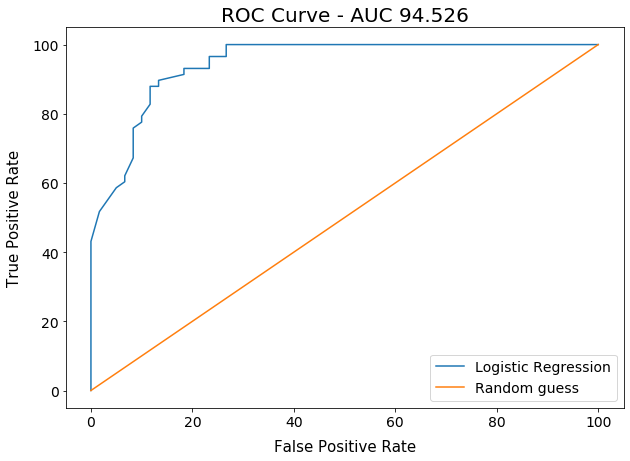

In [9]:
plot_ROC(actual, func_to_predict)

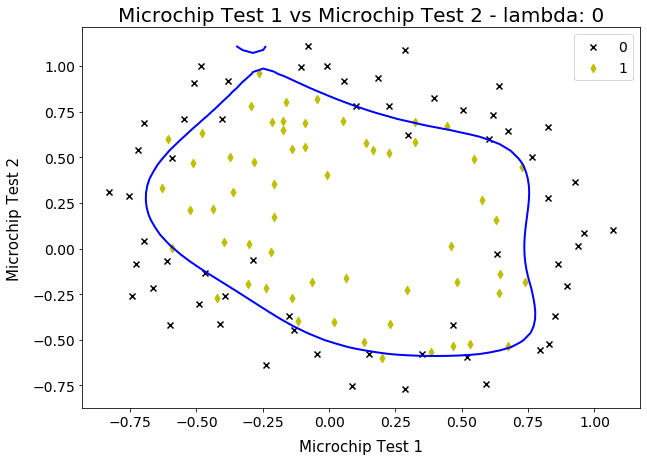

In [10]:
fig, ax = plt.subplots(figsize=(10,7))

# Divide the dataset as negatives and positives.
negatives = ex2data2[ex2data2[:, -1] == 0]
positives = ex2data2[ex2data2[:, -1] == 1]

# Make the plot pretty.
ax.set_xlabel("Microchip Test 1", fontsize=15, labelpad=10)
ax.set_ylabel("Microchip Test 2", fontsize=15, labelpad=10)
ax.set_title("Microchip Test 1 vs Microchip Test 2 - lambda: {}".format(LAMBDA), fontsize=20)
ax.tick_params(labelsize=14)

# Plot both negative and positive classes to the same figure.
plot_data(ax, negatives[:, 0], negatives[:, 1], param_dict={"c": "black", "marker": "x", "label": "0"})
plot_data(ax, positives[:, 0], positives[:, 1], param_dict={"c": "y", "marker": "d", "label": "1"})
ax.legend(prop={'size': 14});

thetas = r_log.thetas

xx1, xx2, h = get_decision_boundary(
    X,
    thetas,
    is_polynomial=True,
    PolynomialFeatures_instance=poly
)

ax.contour(xx1, xx2, h, [0.5], linewidths=2, colors="blue");